## 그래프 그리기

In [4]:
!pip install seaborn

In [1]:
import seaborn as sns

In [84]:
anscombe = sns.load_dataset("anscombe")
anscombe

In [7]:
anscombe.groupby('dataset').var()  # 분산

,x,y
dataset,,
I,11.0,4.127269
II,11.0,4.127629
III,11.0,4.122620
IV,11.0,4.123249


In [10]:
anscombe[anscombe['dataset'] == 'I'].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [11]:
anscombe[anscombe['dataset'] == 'II'].corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [4]:
%matplotlib inline  # = 매직함수. 그림그린걸 브라우저에 표현해주겠다는 매직함수. 생략가능.
import matplotlib.pyplot as plt

UsageError: unrecognized arguments: # = 매직함수. 그림그린걸 브라우저에 표현해주겠다는 매직함수. 생략가능.


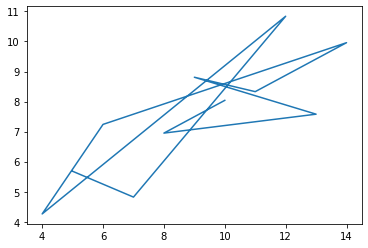

In [17]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

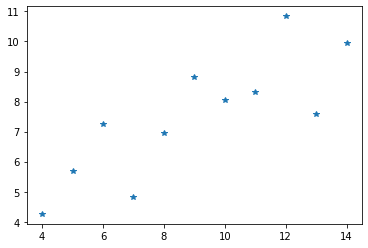

In [18]:
plt.plot(dataset_1['x'], dataset_1['y'],'*') #'o' = 원형 점

#### 4분할 그래프

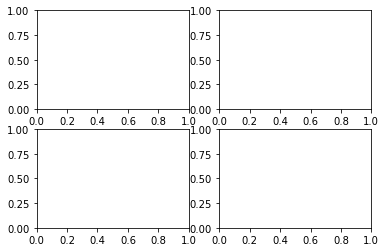

In [19]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure() #그래프 기본 틀 생성
axes1 = fig.add_subplot(2,2,1) # row, col, index
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

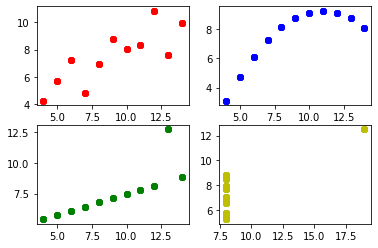

In [25]:
axes1.plot(dataset_1['x'],dataset_1['y'],'ro') # row, col, index
axes2.plot(dataset_2['x'],dataset_2['y'],'bo') 
axes3.plot(dataset_3['x'],dataset_3['y'],'go') # green circle
axes4.plot(dataset_4['x'],dataset_4['y'],'yo')

fig

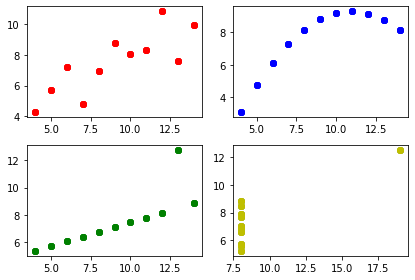

In [26]:
# 레이아웃 최적화
fig.tight_layout()
fig

#### 기초 그래프 그리기

In [28]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


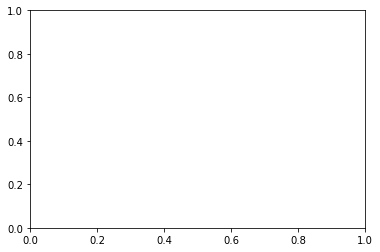

In [83]:
# 히스토그램
# 틀 준비 
fig = plt.figure()  #figsize=(20,20)  # dpi= 해상도
axes1 = fig.add_subplot(1,1,1)

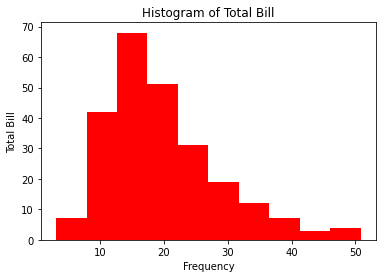

In [46]:
axes1.hist(tips['total_bill'], bins=10, color='red')  # bins = 간격
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

Text(0, 0.5, 'Tip')

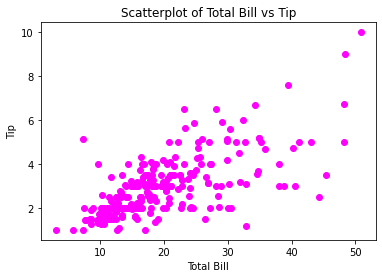

In [49]:
# 산점도
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'],c='magenta')
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Gender')

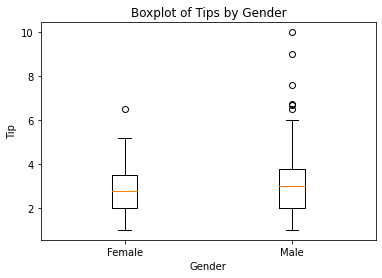

In [53]:
# 박스 그래프
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot(
    [tips[tips['sex'] == 'Female']['tip'],
     tips[tips['sex'] == 'Male']['tip']],
    labels=['Female','Male'])

axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Gender')

#### 다변량그래프 그리기
- 3개 이상 변수 사용

In [57]:
# 성별에 따라 마커의 색상을 변경하기 위한 함수
def recode_gender(gender):
    if gender == 'Female':
        return 'red'
    else:
        return 'blue'

In [58]:
# apply 함수 사용해 데이터 변경 후 color 열에 추가
tips['color'] = tips['sex'].apply(recode_gender)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,color
0,16.99,1.01,Female,No,Sun,Dinner,2,red
1,10.34,1.66,Male,No,Sun,Dinner,3,blue
2,21.01,3.50,Male,No,Sun,Dinner,3,blue
3,23.68,3.31,Male,No,Sun,Dinner,2,blue
4,24.59,3.61,Female,No,Sun,Dinner,4,red


Text(0, 0.5, 'Tip')

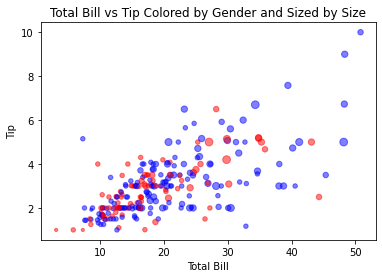

In [60]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['color'],
    alpha=0.5)  # 투명도

axes1.set_title('Total Bill vs Tip Colored by Gender and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')


<BarContainer object of 244 artists>

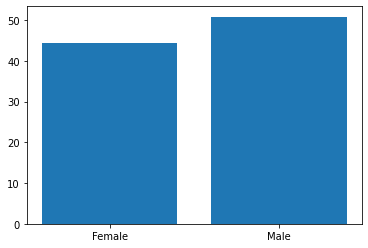

In [61]:
# bar그래프
# 카운트 비교시 많이 사용

bar_plot = plt.figure()
axes1 = bar_plot.add_subplot(1,1,1)

axes1.bar(tips['sex'],tips['total_bill'])

#### 단변량 그래프 그리기

In [2]:
import seaborn as sns

In [5]:
tips = sns.load_dataset('tips')

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

NameError: name 'plt' is not defined

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

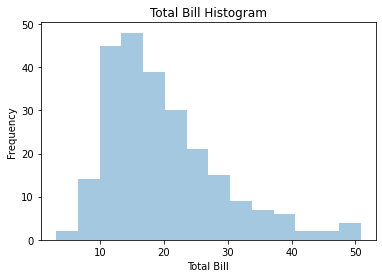

In [65]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

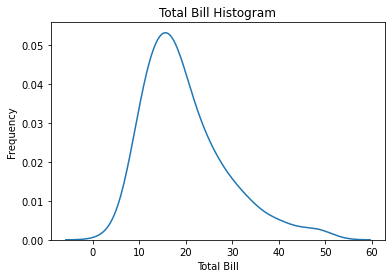

In [66]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'TIp')

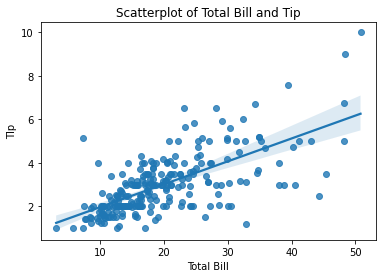

In [67]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('TIp')

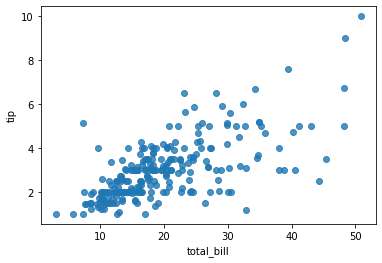

In [69]:
ax = sns.regplot(x='total_bill', y='tip',data=tips, fit_reg = False)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

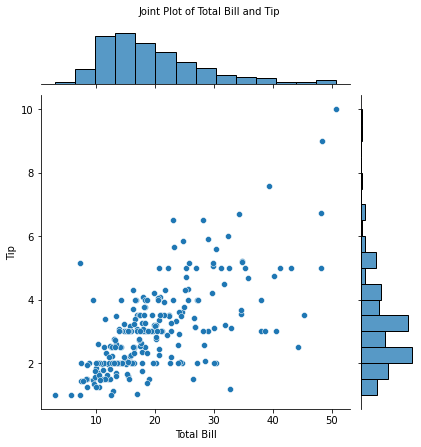

In [72]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

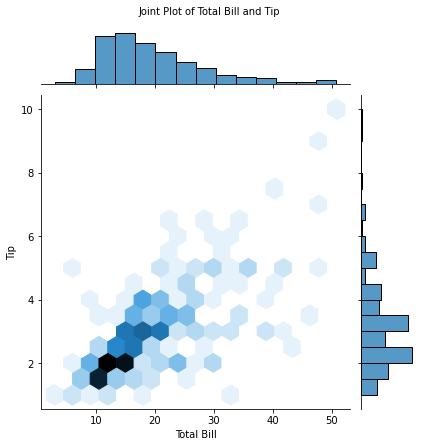

In [73]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0, 0.5, 'Tip')

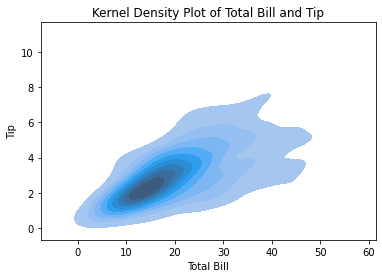

In [74]:
ax = plt.subplots()
ax = sns.kdeplot(x=tips['total_bill'], y=tips['tip'], shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Total Bill')

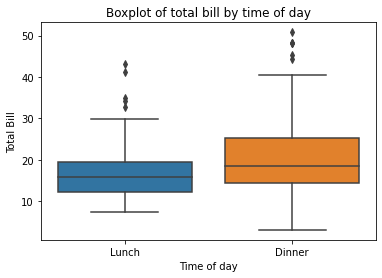

In [75]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Total Bill')

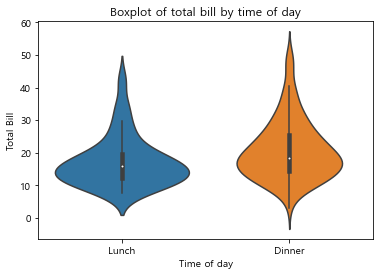

In [97]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 이변량 그래프 그리기

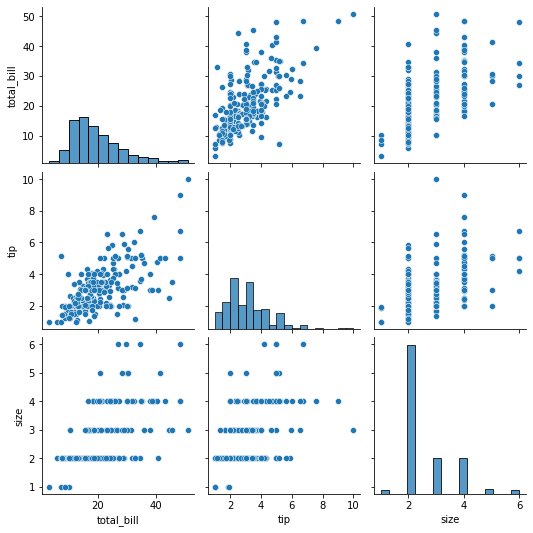

In [78]:
# 관계 그래프 표현
# 데이터에 존재하는 데이터간의 관계 그래프를 한번에 표현
# 가운데 대각선을 기준으로 중복된 정보가 표현되는 단점이 있음.
fig = sns.pairplot(tips)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distr

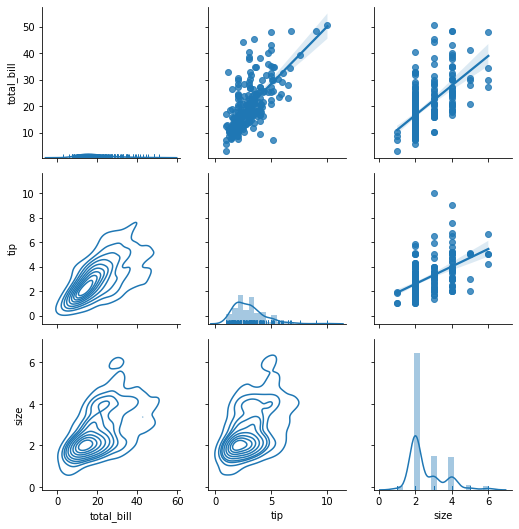

In [79]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

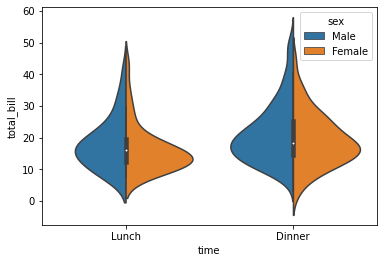

In [80]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips,
                   split=True)

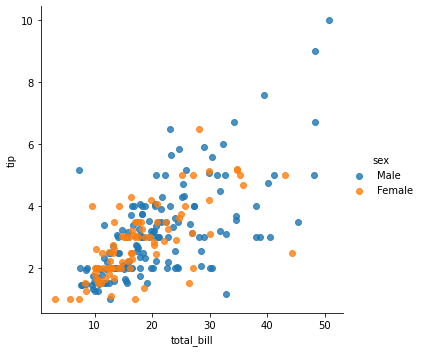

In [81]:
scatter = sns.lmplot(x='total_bill', y='tip',data=tips, hue='sex', fit_reg=False)

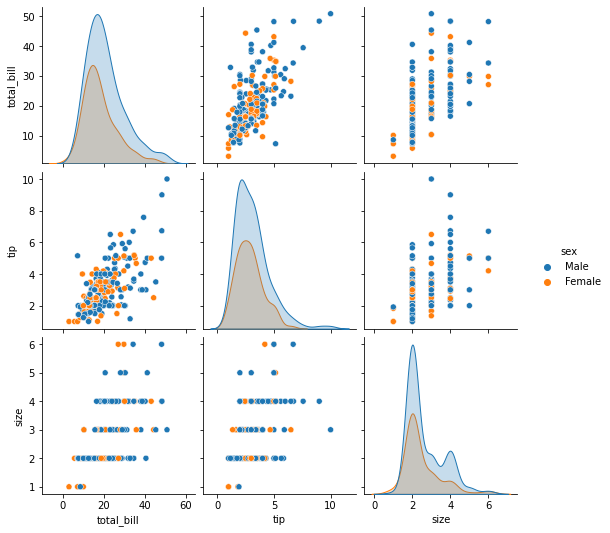

In [86]:
fig = sns.pairplot(tips, hue='sex')

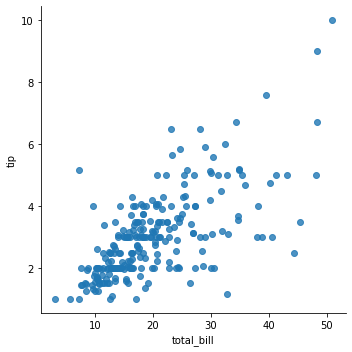

In [88]:
# 크기와 모양으로 표현
sns.lmplot(x='total_bill',y='tip',data=tips, fit_reg=False)
scatter_kws={'s':tips['size']*10}

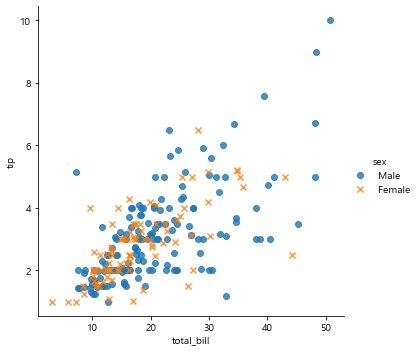

In [95]:
# 크기와 모양으로 표현
sns.lmplot(x='total_bill',y='tip',data=tips, fit_reg=False, hue='sex',markers=['o','x'])

In [94]:
# 그래프 한글 폰트 적용 방법
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 데이터프레임 또는 시리즈의 plot 메소드 사용

<AxesSubplot:>

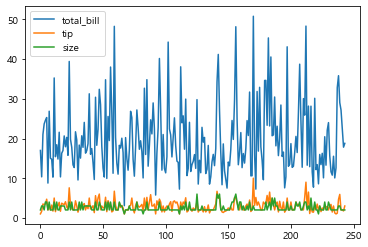

In [98]:
tips.plot()

<AxesSubplot:>

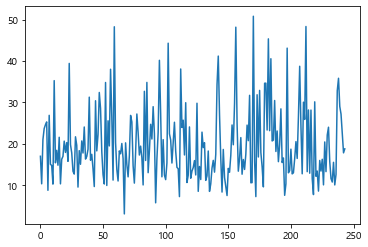

In [100]:
tips['total_bill'].plot()

<AxesSubplot:>

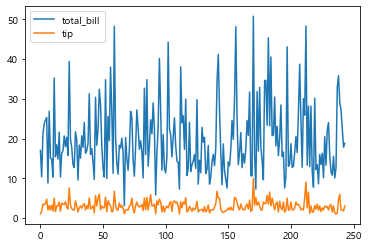

In [101]:
tips[['total_bill', 'tip']].plot()

<AxesSubplot:xlabel='size'>

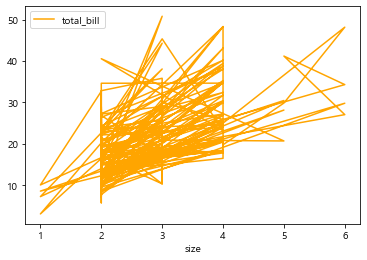

In [103]:
tips[['size','total_bill']].plot(x='size',y='total_bill',c='orange')

<AxesSubplot:ylabel='Frequency'>

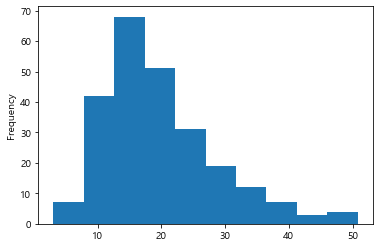

In [104]:
tips['total_bill'].plot.hist()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

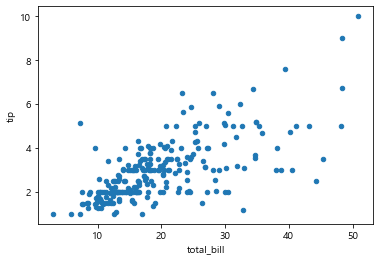

In [105]:
tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:>

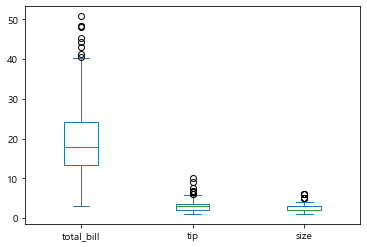

In [107]:
tips.plot.box()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

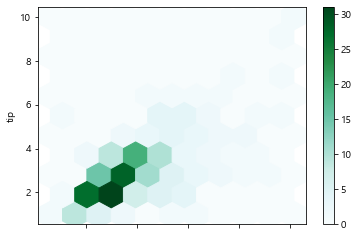

In [108]:
tips.plot.hexbin(x='total_bill',y='tip',gridsize=10)